<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv('states_edu.csv')

Chosen test: **Reading 4th grade**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [3]:
df.sample(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1419,1990_MARYLAND,MARYLAND,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57228.0,49864.0,40529.0,NaN,NaN,715176.0,NaN,261.0,NaN,NaN
366,1999_FLORIDA,FLORIDA,1999,2333567.0,17093036.0,1266927.0,8719985.0,7106124.0,16156822.0,7611469.0,...,190744.0,181574.0,116259.0,1496757.0,655903.0,2381396.0,NaN,NaN,NaN,NaN
1111,2013_SOUTH_CAROLINA,SOUTH_CAROLINA,2013,722249.0,8254462.0,814137.0,3819285.0,3621040.0,8224795.0,3933177.0,...,54672.0,56762.0,44624.0,451301.0,211835.0,745657.0,237.0,280.0,214.0,261.0
844,2008_NEVADA,NEVADA,2008,428776.0,4338601.0,280898.0,2493641.0,1564062.0,4881218.0,2094491.0,...,34099.0,34394.0,23330.0,272468.0,125034.0,433371.0,NaN,NaN,NaN,NaN
441,2000_NORTH_CAROLINA,NORTH_CAROLINA,2000,1261586.0,9064700.0,622184.0,5897936.0,2544580.0,9275837.0,4854623.0,...,105105.0,99295.0,66831.0,835653.0,348168.0,1293638.0,230.0,276.0,NaN,NaN


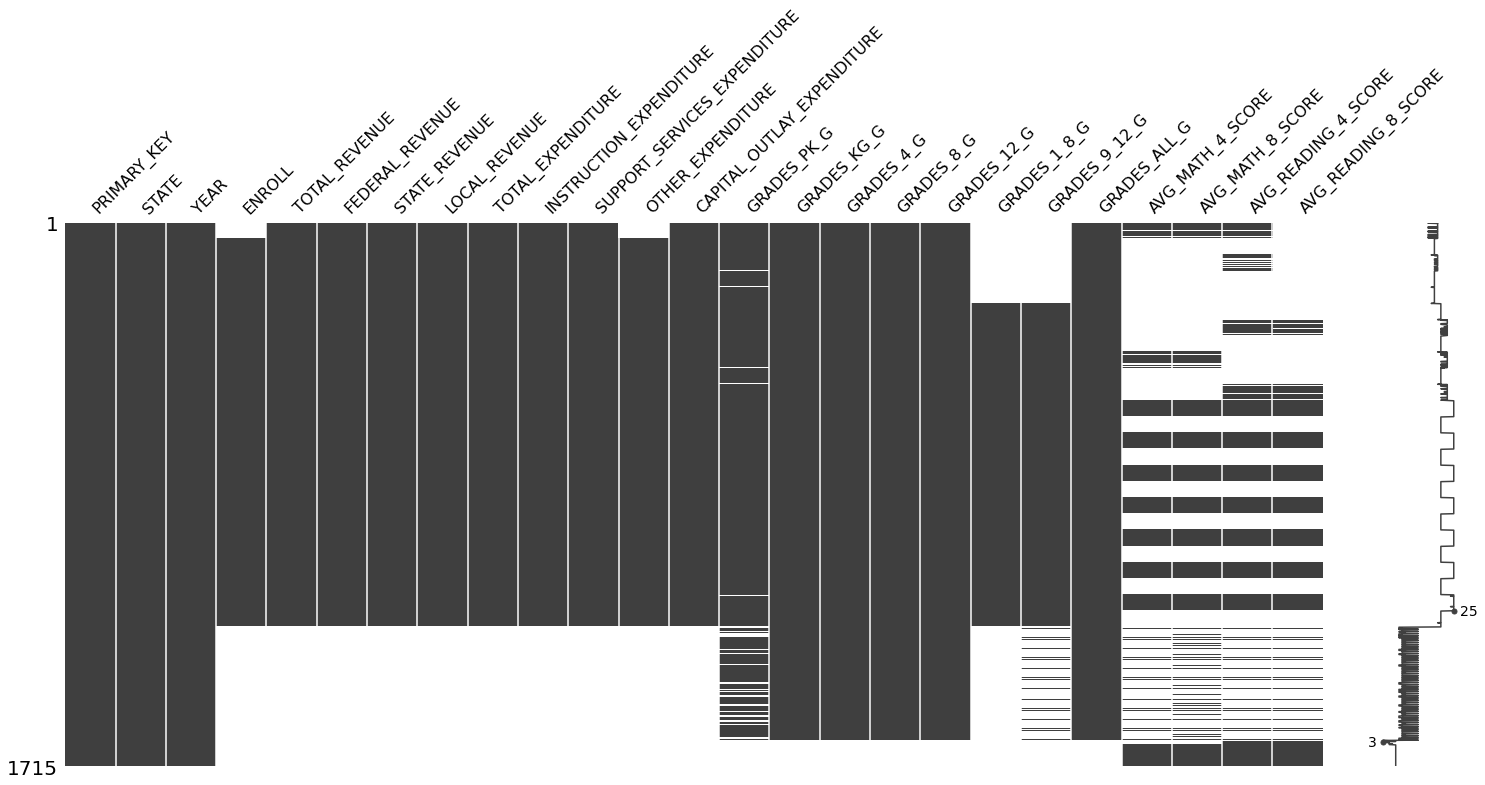

In [4]:
import missingno as msno
msno.matrix(df)

__From the above output, we have a large quantity of missing data. Out of all target variables, it appears that we have the most data available for AVG_READING_4_SCORE. I will focus on predicting this column.__ 

In [5]:
df = df.dropna(subset=["AVG_READING_4_SCORE"]).drop('PRIMARY_KEY',axis = 1)

__Limiting our data to only the rows where 4th grade reading scores are available gives us 650 rows of data from the original 1715__

<h2> Feature Selection </h2>

_Use this space to modify or create features_

__Beyond our target variable, the majority of the information in our dataset appears to berelated to expenditure and revenue by year and state__

__Our target variable is "AVG_READING_4_SCORE", let's examine the relationship this variable has with other in our dataset correlate with this__

In [6]:
df.corr()["AVG_READING_4_SCORE"].sort_values(ascending = False)

AVG_READING_4_SCORE             1.000000
AVG_READING_8_SCORE             0.896509
AVG_MATH_8_SCORE                0.825038
AVG_MATH_4_SCORE                0.772181
YEAR                            0.321162
LOCAL_REVENUE                   0.138795
INSTRUCTION_EXPENDITURE         0.081636
SUPPORT_SERVICES_EXPENDITURE    0.065872
TOTAL_REVENUE                   0.065759
TOTAL_EXPENDITURE               0.063397
STATE_REVENUE                   0.009947
GRADES_PK_G                    -0.001345
CAPITAL_OUTLAY_EXPENDITURE     -0.016318
OTHER_EXPENDITURE              -0.018447
GRADES_12_G                    -0.033048
FEDERAL_REVENUE                -0.033683
GRADES_9_12_G                  -0.054618
ENROLL                         -0.072597
GRADES_8_G                     -0.079223
GRADES_1_8_G                   -0.079353
GRADES_ALL_G                   -0.081319
GRADES_4_G                     -0.093563
GRADES_KG_G                    -0.099669
Name: AVG_READING_4_SCORE, dtype: float64

__The above output tells us that the variables most positvely correlated with the target are 8th grade reading score, 8th grade math score, and 4th grade math score. The variables most negatively correlated with the target are Kindergarden enrollment, 4th grade enrollment, and overall enrollment. Categorical variables are not included in the correlation. Values which appear to have little to no relationship to our target have the smallest absolute value correlation.__

__Looking into the correlations can give us a a quick glance into which features are most important in predicting our target, but it is a naive method. I can do better using more rigorous techniques. One such technique involves information theory. A main tennet of information theory is the idea of mutual information between two variables, $I(w;x)$, which tells us how much the uncertainty about $x's$ outcome drops when we know the value of $w$. This is a very powerful tool that can tell us which features in our dataset are most informative. To utilize it, we will turn to an SK-learn module__

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [12]:
df = df.dropna()

In [18]:
X= df.drop(["AVG_READING_4_SCORE","STATE"],axis = 1)
y = df["AVG_READING_4_SCORE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train.shape

(284, 22)

Feature YEAR: 0.0
Feature ENROLL: 0.23497547029418442
Feature TOTAL_REVENUE: 0.24861569823196783
Feature FEDERAL_REVENUE: 0.14510250368040856
Feature STATE_REVENUE: 0.34176156180442785
Feature LOCAL_REVENUE: 0.10861025661377877
Feature TOTAL_EXPENDITURE: 0.21564427208622972
Feature INSTRUCTION_EXPENDITURE: 0.2022417188226142
Feature SUPPORT_SERVICES_EXPENDITURE: 0.2699256208551666
Feature OTHER_EXPENDITURE: 0.1685402248707617
Feature CAPITAL_OUTLAY_EXPENDITURE: 0.11199209029516499
Feature GRADES_PK_G: 0.16941552631019707
Feature GRADES_KG_G: 0.18421607151605768
Feature GRADES_4_G: 0.20373164369059626
Feature GRADES_8_G: 0.1648360295443334
Feature GRADES_12_G: 0.24528044183606035
Feature GRADES_1_8_G: 0.20462818962751994
Feature GRADES_9_12_G: 0.20744698442069032
Feature GRADES_ALL_G: 0.21504784254230724
Feature AVG_MATH_4_SCORE: 0.6835891818636735
Feature AVG_MATH_8_SCORE: 0.4533774436974274
Feature AVG_READING_8_SCORE: 0.7816326523900998


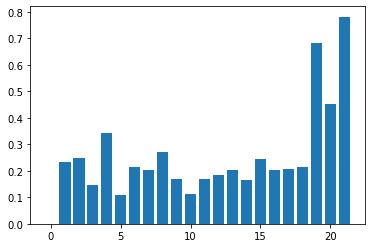

In [42]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
for i in range(len(fs.scores_)):
    print('Feature {name}: {f}'.format(name = X.columns[i] , f =fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

__From the above output and plot, we get a great sense into the amount of information that each variable holds in relationship to AVG_READING_4_SCORE. Our most infromative variable is AVG_READING_8_SCORE, while our least informative is YEAR. We can use tthese values by selecting the most informative as features in our model__

__Multicollinearity is something else we would want to watch out for before we begin our actual modelling. To measure this between variables, we can check the VIF, or variance inflation factor__

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
    
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                         feature           VIF
0                           YEAR  2.519996e+03
1                         ENROLL  2.761120e+03
2                  TOTAL_REVENUE           inf
3                FEDERAL_REVENUE           inf
4                  STATE_REVENUE           inf
5                  LOCAL_REVENUE           inf
6              TOTAL_EXPENDITURE  4.448950e+03
7        INSTRUCTION_EXPENDITURE  8.806751e+02
8   SUPPORT_SERVICES_EXPENDITURE  5.545106e+02
9              OTHER_EXPENDITURE  6.923867e+01
10    CAPITAL_OUTLAY_EXPENDITURE  8.014801e+01
11                   GRADES_PK_G  2.799285e+01
12                   GRADES_KG_G  9.341440e+02
13                    GRADES_4_G  5.593728e+03
14                    GRADES_8_G  5.808277e+03
15                   GRADES_12_G  1.067210e+03
16                  GRADES_1_8_G  2.530161e+04
17                 GRADES_9_12_G  6.542346e+03
18                  GRADES_ALL_G  2.659613e+04
19              AVG_MATH_4_SCORE  1.213830e+04
20           

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


our variables with the highest collinearity are TOTAL_EXPENDITURE and  GRADES_9_12_G

Final feature list: **AVG_MATH_4_SCORE, STATE_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,GRADES_4_G,**

Feature selection justification: **Features were selected by their mutual information, linear correlation, and VIF data. Additionally, I selected features that I thought would be useful given my background knowledge. It doesn't make sense to model 4th grade reading score based on 8th grade exam scores, and while including these variables in my model may improve accuracy, the model may be less helpful for officials who would actually be using results. I decided against using variables that would yield little information about the target visualization**

<h2> EDA </h2>

Visualization 1

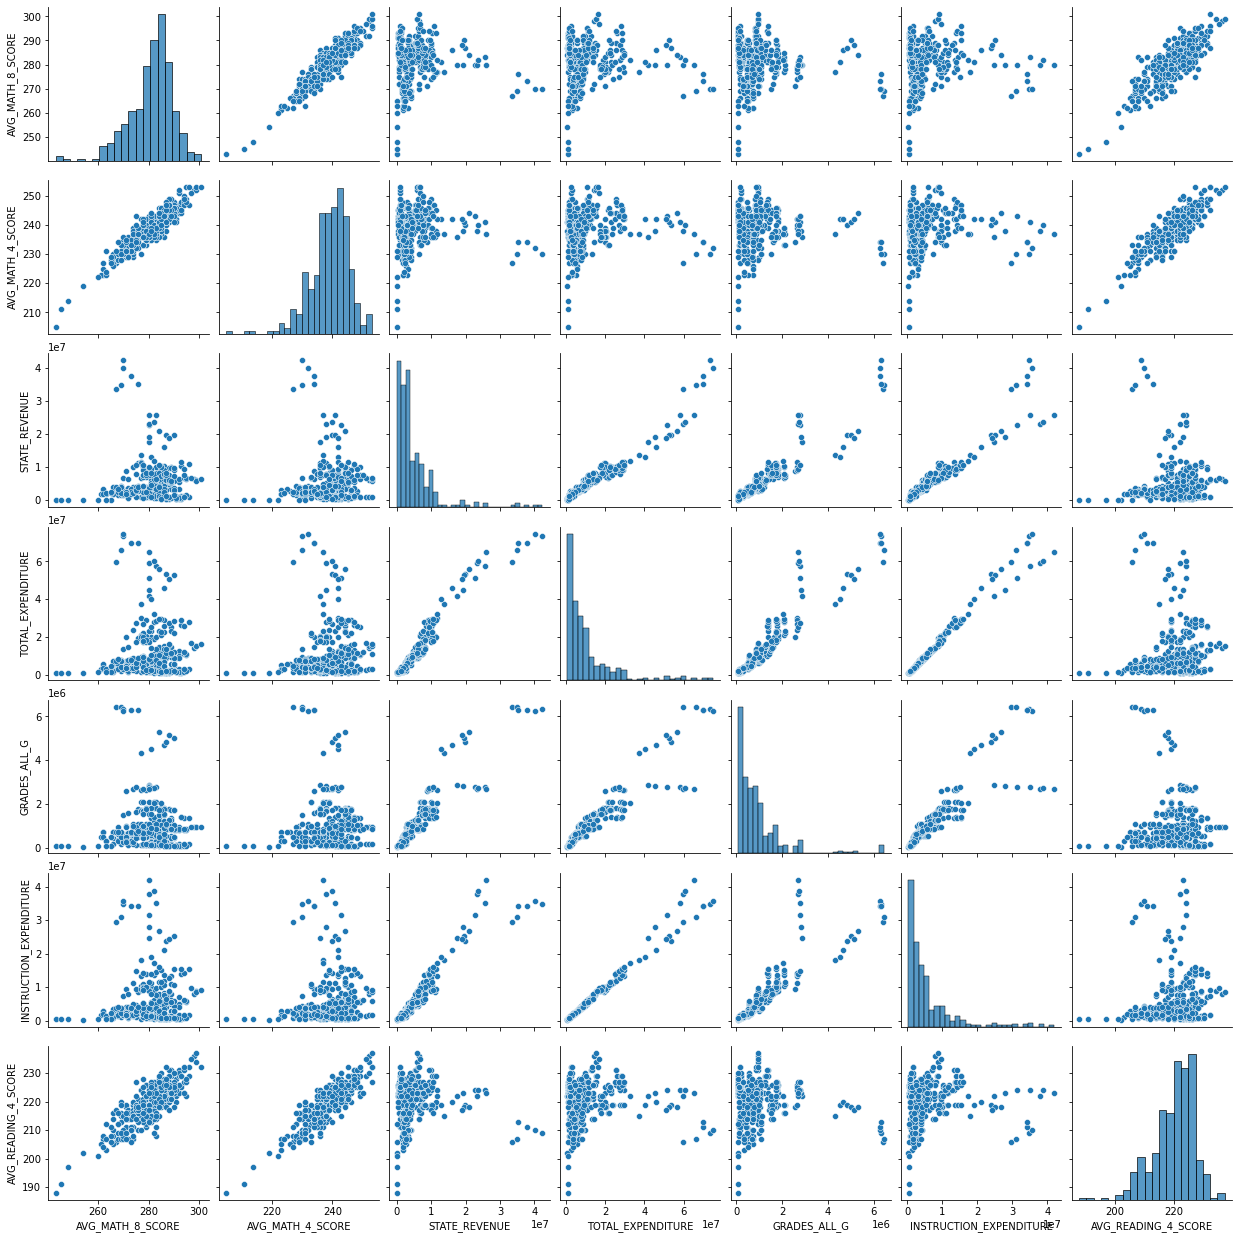

In [82]:
model_df = df[["AVG_MATH_8_SCORE","AVG_MATH_4_SCORE", "STATE_REVENUE","TOTAL_EXPENDITURE","GRADES_ALL_G","INSTRUCTION_EXPENDITURE","AVG_READING_4_SCORE"]
]
sns.pairplot(model_df)

**The pair plot tells us a lot about how the different  variables in my model interact with each other. The target variable is the right most column of the plot. We see the strongest linear relationships amongst the test scores. We all see the distributions of the variables. It's obvious that some of our variables involving revenue and expenditure are quite skewed.**

Visualization 2

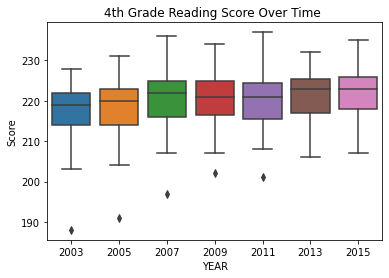

In [97]:
ax = sns.boxplot(x="YEAR", y="AVG_READING_4_SCORE", data=df)
title = ax.set_title("4th Grade Reading Score Over Time ")
y = ax.set_ylabel("Score")

**The above plot shows us how the distribution of reading scores has changed over time. It's intersting that low scoring outliers seem to drop post 2011.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [98]:
from sklearn.model_selection import train_test_split

In [101]:
X = model_df.drop("AVG_READING_4_SCORE",axis = 1)
y = model_df['AVG_READING_4_SCORE']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size = 0.2, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **REGRESSION**

In [103]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [104]:
# create your model here
model = LinearRegression()

In [105]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [106]:
print(model.intercept_)
print(model.coef_)

5.912985224785473
[ 2.38441147e-02  8.69292878e-01 -3.31264301e-07 -8.47568793e-08
 -8.67909209e-07  5.47999548e-07]


In [107]:
y_pred = model.predict(X_test)

In [108]:
print(model.score(X_train,y_train))

0.8050165738131159


In [109]:
# # for classification:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(model, X_test, y_test,
#                          cmap=plt.cm.Blues)

Text(0, 0.5, 'Reading 4 Score')

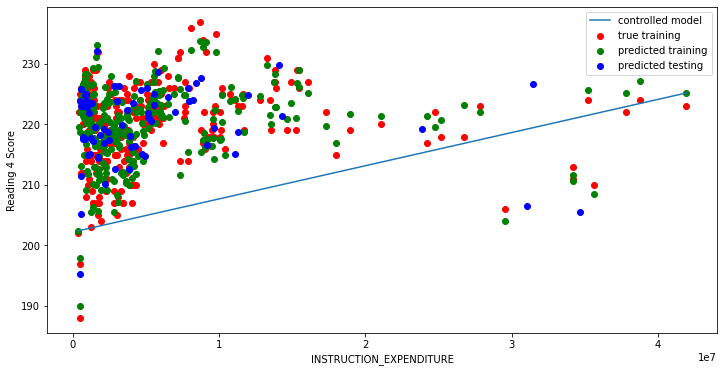

In [111]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "INSTRUCTION_EXPENDITURE"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("Reading 4 Score")

<h2> Summary </h2>

**Through a process of EDA, feature selection, visualization, and model creation, I was able to create a linear regressor to predict the average reading score for 4th graders at a given state and year based on 6 variables. My model yields an $R^2$ value of 0.805, indicating that it explains rougly 80% of the variation in our data. Though I probably could've increased model accuracy by including highly correlated variables like 8th grade reading score, I don't think those variables would be of much use to a decision maker. From the model, we see that some variables which are intuitively useful, like how much a state is spending on instruction, has a positive influence on student's reading scores. Based on this variable and the others in my model, I think that average student performance across a state can be predicted :-). More data would make our prediction more robust, but we are doing the best we can with what we have.**